#  Estatística
### Exercício Individual Probabilidade e Amostragem 

In [57]:

# Importando todas as bibliotecas utilizadas no desafio:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística e testes de hipóteses
from scipy.stats import norm


In [58]:


url = 'https://raw.githubusercontent.com/CristianaMoura/Desafios_Individuais_DadosWomakersCode/main/exer_prob_amostr/populacao_brasileira.csv'
df = pd.read_csv(url)

print(df.head(10))



   Unnamed: 0 estado  idade escolaridade nível de proficiência em inglês  \
0           0     MA     56  Fundamental                   Intermediário   
1           1     BA     46     Superior                          Básico   
2           2     AM     32  Fundamental                   Intermediário   
3           3     CE     60     Superior                          Básico   
4           4     SE     25  Fundamental                        Avançado   
5           5     AM     38  Fundamental                        Avançado   
6           6     DF     56        Médio                   Intermediário   
7           7     DF     36     Superior                        Avançado   
8           8     PI     40  Fundamental                          Básico   
9           9     AP     28     Superior                        Avançado   

     renda sexo  
0  4006.29    F  
1  2423.11    M  
2  3835.69    M  
3  1870.29    M  
4  3529.80    M  
5  4441.57    F  
6   528.36    F  
7  2203.10    F  
8

1.  Considere  pessoas  fluentes  em  inglês, qual a
    probabilidade complementar?
    Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.




In [59]:
df_fluente = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]
print(df_fluente)

df_nao_fluente = df[df['nível de proficiência em inglês'] != 'Avançado'].shape[0]
print(df_nao_fluente)

probabilidade = df_nao_fluente / (df_fluente + df_nao_fluente)*100

print(f"A probabilidade é % {probabilidade:.1f} da pessoa escolhida não ser fluente.")

344
656
A probabilidade é % 65.6 da pessoa escolhida não ser fluente.


2 - Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [60]:
total_pessoas = len(df)

df_estados = df[df["estado"].isin(["AL", "PA"])]
total_estados = len(df_estados)
print(total_estados)

renda_acima = df_estados[df_estados["renda"] > 5000].shape[0]
print(renda_acima)

prob_renda_estados = (renda_acima / total_estados) *100


print(f"A probabilidade é % {prob_renda_estados:.1f} da pessoa escolhida ter a renda acima de 5 mil Reais.")


79
4
A probabilidade é % 5.1 da pessoa escolhida ter a renda acima de 5 mil Reais.


3 - Descubra a probabilidade de uma pessoa, residente
  no estado do Amazonas, ter ensino superior completo (considerando apenas a escolaridade classificada como 'Superior'). Qual a probabilidade da quinta pessoa amazonense que você conversar ter ensino superior completo?


In [61]:
df_estado = df[df["estado"] == "AM"]
total_estado = len(df_estado)
print(total_estado)

df_superior = df_estado[df_estado["escolaridade"] == "Superior"]
total_superior = len(df_superior)
print(total_superior)



prob_superior = (total_superior / total_estado) *100

print(f"A probabilidade é % {prob_superior:.1f} da quinta pessoa escolhida ter ensino superior.")



38
9
A probabilidade é % 23.7 da quinta pessoa escolhida ter ensino superior.


4. Considerando a renda das pessoas do nosso conjunto, podemos dizerque a renda de uma pessoa brasileira está na sua maioria em que faixa(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


In [62]:
# Criar faixas de renda de 1.500 em 1.500
df['faixa_renda'] = pd.cut(df['renda'], bins=np.arange(0, df['renda'].max() + 1500, 1500))

# Contar quantas pessoas estão em cada faixa
faixa_mais_comum = df['faixa_renda'].value_counts().idxmax()

print(f'A faixa de renda mais comum é: {faixa_mais_comum}')


A faixa de renda mais comum é: (3000.0, 4500.0]


5. Calcule a média e a variância da renda da amostra. Depois faça adistribuição normal, inclua o gráfico.


In [63]:
# Calcular média e variância da renda
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f'Média da renda: R$ {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')

Média da renda: R$ 3082.54
Variância da renda: 993156.23


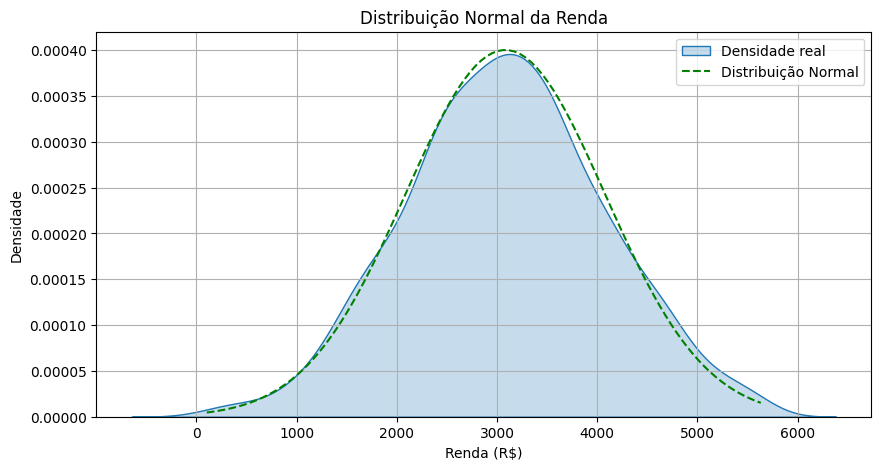

In [64]:
# Calcular desvio padrão
desvio_padrao_renda = np.sqrt(variancia_renda)

# Criar valores para o eixo X (renda)
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)

# Criar a distribuição normal teórica
pdf = norm.pdf(x, media_renda, desvio_padrao_renda)

# Criar o gráfico
plt.figure(figsize=(10,5))

# Plotar a densidade real da renda
sns.kdeplot(df['renda'], fill=True, label='Densidade real')

# Plotar a distribuição normal teórica
plt.plot(x, pdf, label='Distribuição Normal', color='green', linestyle='dashed')

# Ajustes do gráfico
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade')
plt.title('Distribuição Normal da Renda')
plt.legend()
plt.grid(True)
plt.show()

6.  Primeiro  considere  a  probabilidade  encontrada  no  nosso  conjunto  depessoas com escolaridade de pós-graduação. Considerando a amostra depopulação brasileira com 1 milhão de habitantes, qual a probabilidade deencontrarmos 243 mil pessoas com pós-graduação?


In [65]:

from scipy.stats import binom

# Calcular a proporção de pessoas com pós-graduação na amostra
p = len(df[df['escolaridade'] == 'Pós-Graduação']) / len(df)

# Definir os valores do problema
n = 1_000_000  # População de 1 milhão
k = 243_000  # Queremos encontrar 243 mil pessoas com pós-graduação

# Calcular a probabilidade usando a distribuição binomial
prob = binom.pmf(k, n, p)

print(f'Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: {prob:.2f}')

Probabilidade de encontrar exatamente 243 mil pessoas com pós-graduação: 0.00


7.  Somando  as  densidades  nós  temos  a  função   
    de  densida  de  acumulada.Considerando  a  coluna  ‘Escolaridade’  faça  a  função  de  densidadeacumulada discreta para cada nível de escolaridade.

escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: proportion, dtype: float64


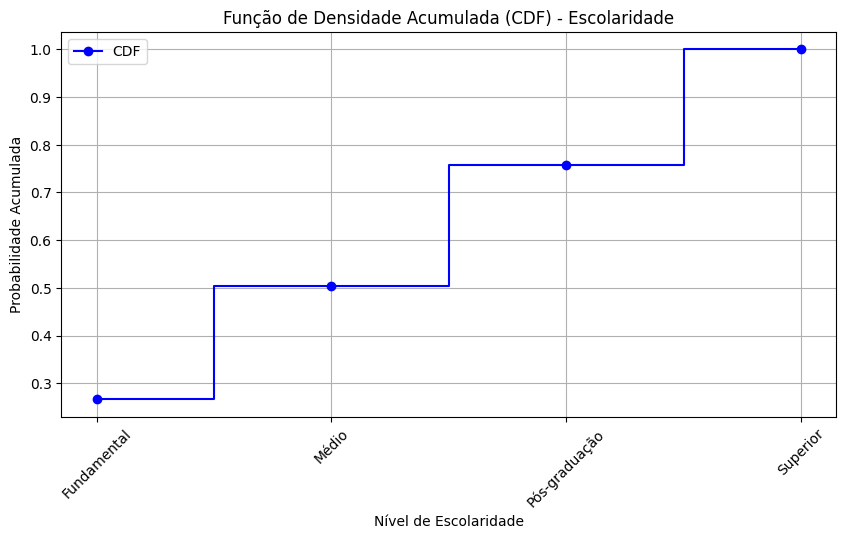

In [66]:
# Contar a frequência de cada escolaridade
freq_escolaridade = df['escolaridade'].value_counts(normalize=True).sort_index() #value_counts(normalize=True) → Obtém a frequência relativa de cada escolaridade.sort_index() → Ordena os níveis de escolaridade.

# Calcular a densidade acumulada
cdf_escolaridade = freq_escolaridade.cumsum() #cumsum() → Calcula a soma acumulada para obter a CDF.

# Exibir a CDF
print(cdf_escolaridade)

# Plotar a CDF
plt.figure(figsize=(10,5))
plt.step(cdf_escolaridade.index, cdf_escolaridade, where='mid', linestyle='-', marker='o', color='b', label='CDF') #Gráfico plt.step() → Representa a CDF discreta, já que os dados são categóricos.

# Ajustes no gráfico
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Probabilidade Acumulada')
plt.title('Função de Densidade Acumulada (CDF) - Escolaridade')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

8.  Qual  a  margem  de  erro  amostral  da   
    proporção  populacionalconsiderando a proporção de pessoas com nível de inglês intermediário?

In [67]:
# Calcular a proporção de pessoas com nível de inglês intermediário
p = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / len(df)

# Tamanho da amostra
n = len(df)

# Valor crítico para um intervalo de confiança de 95%
z = norm.ppf(0.975)  # 1.96 aproximadamente

# Calcular a margem de erro
margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f'Margem de erro amostral: {margem_erro:.4f}')

Margem de erro amostral: 0.0291


9. Calcula a renda da população. Qual a probabilidade
   de encontrar 60pessoas com uma renda mil reais superior à média?

In [68]:
# Calcular a média da renda
media_renda = df['renda'].mean()

# Definir o limite superior (média + 1000)
limite_superior = media_renda + 1000

# Calcular a proporção de pessoas com renda maior que o limite
p = len(df[df['renda'] > limite_superior]) / len(df)

# Definir parâmetros da binomial
n = len(df)  # Tamanho da amostra
k = 60  # Número de pessoas que queremos encontrar

# Calcular a probabilidade de encontrar exatamente 60 pessoas com essa renda
prob_60 = binom.pmf(k, n, p)

print(f'Probabilidade de encontrar exatamente 60 pessoas com renda > {limite_superior:.2f}: {prob_60:.10f}')


Probabilidade de encontrar exatamente 60 pessoas com renda > 4082.54: 0.0000000000


10. Qual é a probabilidade de escolhermos uma pessoa
    residente na regiãoSudeste  que  seja  homem,  tenha  apenas  ensino  fundamental  completo  epossua renda mensal superior a 2 mil reais?

In [70]:
# Dicionário de estados e suas respectivas regiões
regioes = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Carregar o dataset
df = pd.read_csv(url)

# Criar a nova coluna "região" baseada na coluna "estado" Usar o método .map() do pandas para criar uma nova coluna chamada "região"
df['região'] = df['estado'].map(regioes)

# Exibir as primeiras linhas para verificar
print(df[['estado', 'região']].head())

  estado    região
0     MA  Nordeste
1     BA  Nordeste
2     AM     Norte
3     CE  Nordeste
4     SE  Nordeste


In [71]:
# Filtrar os critérios
filtro = (
    (df['região'] == 'Sudeste') &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
)

# Contar quantas pessoas atendem aos critérios
num_pessoas = df[filtro].shape[0]

# Calcular a probabilidade (proporção na amostra)
probabilidade = num_pessoas / len(df)*100

print(f'Probabilidade de encontrar uma pessoa com essas características: {probabilidade:.2f}%')



Probabilidade de encontrar uma pessoa com essas características: 1.90%
